# 🌦️ **IMD 2017 Rainfall Analysis & Prediction**

#### 🧠 Project Overview

##### This project analyzes and predicts annual rainfall in India using data from the India Meteorological Department (IMD) (1901–2017).
##### We use Python, Pandas, Matplotlib, Seaborn, and Random Forest Regressor to clean data, explore patterns, and forecast rainfall for the next year.

## **$1.$ Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set styles for plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,5)

## **$2.$ Load dataset**

In [5]:
df = pd.read_csv("Sub_Division_IMD_2017.csv")

In [7]:
df

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6
4184,Lakshadweep,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5
4185,Lakshadweep,2015,2.2,0.5,3.7,87.1,133.1,296.6,257.5,146.4,160.4,165.4,231.0,159.0,1642.9,2.7,223.9,860.9,555.4
4186,Lakshadweep,2016,59.6,12.1,3.2,2.6,77.4,321.1,262.6,86.2,75.6,58.6,32.0,74.7,1065.7,71.7,83.2,745.4,165.4


In [9]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [11]:
df.shape

(4188, 19)

In [13]:
df.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,Andaman & Nicobar Islands,1906,36.6,0.0,0.0,0.0,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,Andaman & Nicobar Islands,1907,110.7,0.0,113.3,21.6,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,Andaman & Nicobar Islands,1908,20.9,85.1,0.0,29.0,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,Andaman & Nicobar Islands,1910,26.6,22.7,206.3,89.3,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,Andaman & Nicobar Islands,1911,0.0,8.4,0.0,122.5,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [15]:
df.describe()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
count,4188.000000,4184.000000,4185.000000,4182.000000,4184.000000,4185.000000,4183.000000,4181.000000,4184.000000,4182.000000,4181.000000,4177.000000,4178.000000,4162.000000,4182.000000,4179.000000,4178.000000,4175.000000
mean,1959.220630,18.938337,21.599427,27.412912,43.071845,85.660860,230.117475,347.020043,289.742185,197.316332,95.324707,39.496433,18.968645,1409.449207,40.522979,155.820914,1063.851580,153.648623
std,33.717097,33.793128,35.731734,46.927963,68.150985,122.695137,234.292087,268.850702,188.426071,135.547646,99.194851,68.358706,43.053759,902.599421,59.293904,201.198627,706.666045,166.863171
min,1901.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.400000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,62.300000,0.000000,0.000000,57.400000,0.000000
25%,1930.000000,0.600000,0.500000,1.000000,3.000000,8.600000,70.800000,175.600000,155.850000,100.400000,14.600000,0.600000,0.100000,803.025000,4.000000,24.000000,573.850000,34.000000
50%,1959.000000,5.950000,6.500000,7.900000,15.450000,36.900000,138.800000,285.000000,258.500000,173.700000,65.200000,9.400000,3.000000,1120.350000,18.900000,74.800000,880.600000,97.700000
75%,1988.000000,22.000000,26.600000,31.375000,49.650000,97.800000,305.000000,418.500000,377.625000,266.125000,148.300000,45.300000,17.500000,1643.575000,50.175000,196.950000,1287.450000,211.800000
max,2017.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4188 entries, 0 to 4187
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4188 non-null   object 
 1   YEAR         4188 non-null   int64  
 2   JAN          4184 non-null   float64
 3   FEB          4185 non-null   float64
 4   MAR          4182 non-null   float64
 5   APR          4184 non-null   float64
 6   MAY          4185 non-null   float64
 7   JUN          4183 non-null   float64
 8   JUL          4181 non-null   float64
 9   AUG          4184 non-null   float64
 10  SEP          4182 non-null   float64
 11  OCT          4181 non-null   float64
 12  NOV          4177 non-null   float64
 13  DEC          4178 non-null   float64
 14  ANNUAL       4162 non-null   float64
 15  JF           4182 non-null   float64
 16  MAM          4179 non-null   float64
 17  JJAS         4178 non-null   float64
 18  OND          4175 non-null   float64
dtypes: flo

## **$3.$ Keep only useful columns**

In [20]:
needed_cols = ["SUBDIVISION","YEAR","JF","MAM","JJAS","OND","ANNUAL"]
df = df[needed_cols]

In [22]:
df.shape

(4188, 7)

In [24]:
df.columns

Index(['SUBDIVISION', 'YEAR', 'JF', 'MAM', 'JJAS', 'OND', 'ANNUAL'], dtype='object')

## **$4.$ Clean data**

In [26]:
# Rename columns for readability
df.rename(columns={
    "SUBDIVISION" : "Subdivision",
    "YEAR" : "Year",
    "JF" : "Rainfall_JF",
    "MAM" : "Rainfall_MAM",
    "JJAS" : "Rainfall_JJAS",
    "OND" : "Rainfall_OND",
    "ANNUAL" : "Rainfall_Annual"
}, inplace=True)
    

In [28]:
df

,Subdivision,Year,Rainfall_JF,Rainfall_MAM,Rainfall_JJAS,Rainfall_OND,Rainfall_Annual
0,Andaman & Nicobar Islands,1901,136.3,560.3,1696.3,980.3,3373.2
1,Andaman & Nicobar Islands,1902,159.8,458.3,2185.9,716.7,3520.7
2,Andaman & Nicobar Islands,1903,156.7,236.1,1874.0,690.6,2957.4
3,Andaman & Nicobar Islands,1904,24.1,506.9,1977.6,571.0,3079.6
4,Andaman & Nicobar Islands,1905,1.3,309.7,1624.9,630.8,2566.7
...,...,...,...,...,...,...,...
4183,Lakshadweep,2013,60.6,131.1,1057.0,177.6,1426.3
4184,Lakshadweep,2014,69.3,76.7,958.5,290.5,1395.0
4185,Lakshadweep,2015,2.7,223.9,860.9,555.4,1642.9
4186,Lakshadweep,2016,71.7,83.2,745.4,165.4,1065.7


In [30]:
# Handle missing values
df.isnull().sum()

Subdivision         0
Year                0
Rainfall_JF         6
Rainfall_MAM        9
Rainfall_JJAS      10
Rainfall_OND       13
Rainfall_Annual    26
dtype: int64

In [32]:
df.dropna(subset=["Subdivision","Year","Rainfall_Annual"], inplace=True)
for col in ["Rainfall_JF", "Rainfall_MAM", "Rainfall_JJAS", "Rainfall_Annual"]:
    df[col].fillna(df[col].median(), inplace=True)

In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4162 entries, 0 to 4187
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Subdivision      4162 non-null   object 
 1   Year             4162 non-null   int64  
 2   Rainfall_JF      4162 non-null   float64
 3   Rainfall_MAM     4162 non-null   float64
 4   Rainfall_JJAS    4162 non-null   float64
 5   Rainfall_OND     4162 non-null   float64
 6   Rainfall_Annual  4162 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 260.1+ KB
None


## **$5.$ Exploratory Data Analysis (EDA)**

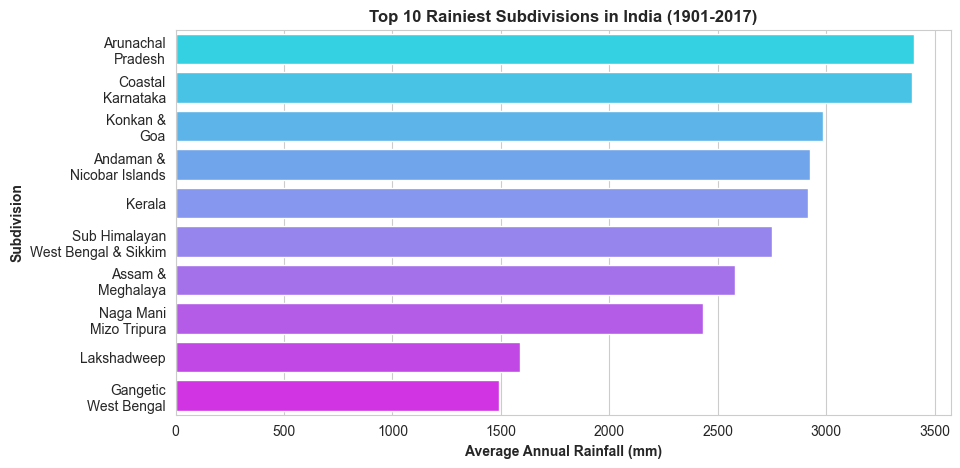

In [52]:
# Average rainfall per subdivision
avg_rain = df.groupby("Subdivision")["Rainfall_Annual"].mean().sort_values(ascending=False)
sns.barplot(x=avg_rain.head(10).values, y=avg_rain.head(10).index, palette="cool")
plt.title("Top 10 Rainiest Subdivisions in India (1901-2017)", weight="bold")
plt.xlabel("Average Annual Rainfall (mm)", weight="bold")
plt.ylabel("Subdivision",weight="bold")
plt.yticks(ticks=[0,1,2,3,4,5,6,7,8,9],
            labels=["Arunachal\nPradesh","Coastal\nKarnataka","Konkan &\nGoa", "Andaman &\nNicobar Islands", "Kerala",
                   "Sub Himalayan\nWest Bengal & Sikkim","Assam &\nMeghalaya", "Naga Mani\nMizo Tripura", "Lakshadweep", "Gangetic\nWest Bengal"])
plt.show()

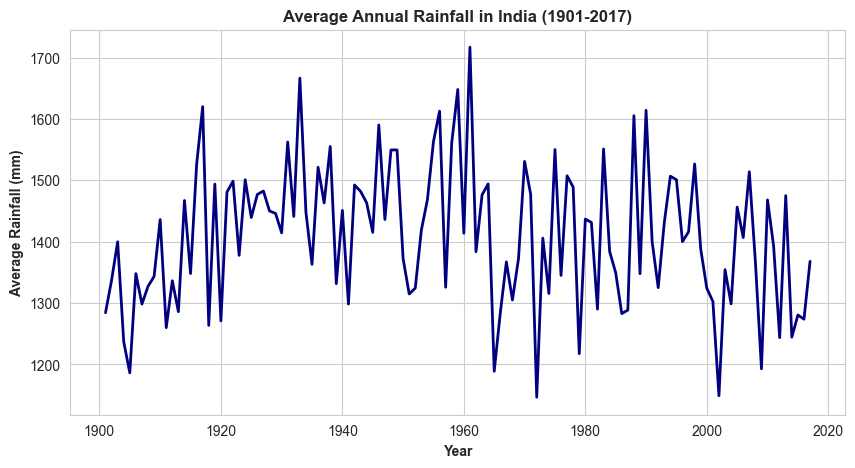

In [56]:
# Annual rainfall trend for India
yearly_avg = df.groupby("Year")["Rainfall_Annual"].mean()
plt.plot(yearly_avg, color="navy", linewidth=2)
plt.title("Average Annual Rainfall in India (1901-2017)", weight="bold")
plt.xlabel("Year", weight="bold")
plt.ylabel("Average Rainfall (mm)", weight="bold")
plt.show()

## **$6.$ Feature Engineeering**

In [59]:
# Encode region names
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [61]:
df["Subdivision_Code"] = le.fit_transform(df["Subdivision"])

In [63]:
# Lag feature (previous year rainfall)
df = df.sort_values(['Subdivision', 'Year'])
df['Prev_Rainfall'] = df.groupby('Subdivision')['Rainfall_Annual'].shift(1)
df.dropna(inplace=True)

## **$7.$ Model Training**

In [69]:
features = ["Year", "Subdivision_Code", "Prev_Rainfall", "Rainfall_JF", 
           "Rainfall_MAM", "Rainfall_JJAS", "Rainfall_OND"]
X = df[features]
y = df["Rainfall_Annual"]

In [71]:
# Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# Train model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [75]:
# Evaluate
from sklearn.metrics import r2_score, mean_absolute_error
y_pred = model.predict(X_test)
print("R² Score:", round(r2_score(y_test, y_pred), 3))
print("MAE:", round(mean_absolute_error(y_test, y_pred), 3))

R² Score: 0.991
MAE: 38.384


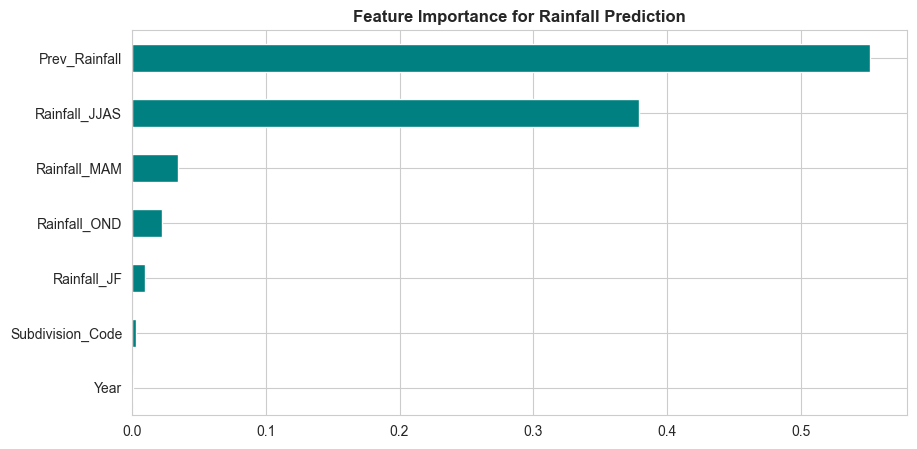

In [77]:
# Feature importance 
imp = pd.Series(model.feature_importances_, index=features).sort_values(ascending=True)
imp.plot(kind='barh', color='teal')
plt.title("Feature Importance for Rainfall Prediction", weight="bold")
plt.show()

## **$8.$ Predict Next-Year Rainfall**

In [84]:
latest_year = df["Year"].max()
next_year = latest_year + 1

In [88]:
# Prepare data for next year preparation
latest_data = df[df['Year'] == latest_year][['Subdivision', 'Subdivision_Code', 
                                             'Rainfall_JF', 'Rainfall_MAM', 
                                             'Rainfall_JJAS', 'Rainfall_OND', 
                                             'Rainfall_Annual']]
latest_data.rename(columns={'Rainfall_Annual': 'Prev_Rainfall'}, inplace=True)
latest_data['Year'] = next_year

In [106]:
# Predict rainfall for the next year
future_pred = model.predict(latest_data[['Year', 'Subdivision_Code', 
                                         'Prev_Rainfall', 'Rainfall_JF', 
                                         'Rainfall_MAM', 'Rainfall_JJAS', 'Rainfall_OND']])
# Add predictions to dataframe
latest_data['Predicted_Rainfall (mm)'] = future_pred

# Select and neatly arrange columns
results = latest_data[['Subdivision', 'Year', 'Prev_Rainfall',
                       'Predicted_Rainfall (mm)',
                       'Rainfall_JF', 'Rainfall_MAM',
                       'Rainfall_JJAS', 'Rainfall_OND']]

# Round numeric values for clean display
results = results.round(2)

# Show the first few rows as a formatted table
print("🌦️ Predicted Rainfall for Next Year (Sample):")
display(results.head(10))  

🌦️ Predicted Rainfall for Next Year (Sample):


,Subdivision,Year,Prev_Rainfall,Predicted_Rainfall (mm),Rainfall_JF,Rainfall_MAM,Rainfall_JJAS,Rainfall_OND
111,Andaman & Nicobar Islands,2018,2890.0,2885.97,234.2,417.1,1526.0,712.6
210,Arunachal Pradesh,2018,2745.3,2678.92,94.4,827.0,1583.5,240.3
327,Assam & Meghalaya,2018,2711.7,2716.16,39.5,695.9,1742.7,233.5
1029,Bihar,2018,1112.0,1135.45,0.7,124.3,936.8,50.2
3135,Chhattisgarh,2018,1124.4,1128.73,1.6,19.8,1041.2,61.8
3252,Coastal Andhra Pradesh,2018,892.7,894.86,1.0,52.0,668.8,170.9
3720,Coastal Karnataka,2018,2947.6,3001.59,1.1,141.0,2593.2,212.3
2316,East Madhya Pradesh,2018,840.1,842.85,11.3,13.4,795.8,19.5
2082,East Rajasthan,2018,600.3,617.91,8.4,21.3,566.9,3.8
1146,East Uttar Pradesh,2018,695.0,698.19,9.8,32.2,650.0,3.0


## **$10.$ Conclusion**

### ✅ Project Summary:
- Cleaned IMD 2017 rainfall dataset
- Explored long-term rainfall trends across India
- Trained a Random Forest model for annual rainfall prediction
- Predicted rainfall for next year

### ⭐ Skills Used: Python, Pandas, EDA, Machine Learning, Data Visualization, Feature Engineering
### ⭐ Dataset: IMD Rainfall Data (1901–2017)